# DATA PREPARATION

In [1]:
#import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [2]:
#loading dataset
healthcare = pd.read_csv("healthcare_dataset.csv")

In [3]:
#First 5 observations
healthcare.head()

,Age,BMI,BloodPressure,Cholesterol,Glucose,Insulin,HeartRate,Smoker,PhysicalActivity,SleepTime,MedicalHistoryScore,IncomeLevel,StressLevel,HealthIns,Disease
0,56,27.577099,88.0,108.0,92,171,75,0,Medium,9,5,High,Low,No,Disease_B
1,69,26.233744,88.0,252.0,102,179,71,0,High,9,3,High,Medium,Yes,Disease_A
2,46,29.646620,152.0,141.0,89,198,90,1,Low,5,5,Medium,Medium,No,Disease_C
3,32,30.619597,106.0,273.0,159,222,64,1,Medium,7,0,Medium,High,No,Disease_C
4,60,16.794395,96.0,172.0,173,30,99,1,Low,7,3,High,Medium,No,Disease_B


In [4]:
#how many observations and features
healthcare.shape

(5000, 15)

In [5]:
#checking data types and missing values
healthcare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  5000 non-null   int64  
 1   BMI                  4750 non-null   float64
 2   BloodPressure        4750 non-null   float64
 3   Cholesterol          4750 non-null   float64
 4   Glucose              5000 non-null   int64  
 5   Insulin              5000 non-null   int64  
 6   HeartRate            5000 non-null   int64  
 7   Smoker               5000 non-null   int64  
 8   PhysicalActivity     5000 non-null   object 
 9   SleepTime            5000 non-null   int64  
 10  MedicalHistoryScore  5000 non-null   int64  
 11  IncomeLevel          5000 non-null   object 
 12  StressLevel          5000 non-null   object 
 13  HealthIns            5000 non-null   object 
 14  Disease              3742 non-null   object 
dtypes: float64(3), int64(7), object(5)
mem

After comparing the data from the .info () cell with the feature contents , as seen in "Out[3]:" / .head() cell, I can see all the data types are correct for each features. 

In [6]:
#how many missing values per feature
healthcare.isnull().sum()

Age                       0
BMI                     250
BloodPressure           250
Cholesterol             250
Glucose                   0
Insulin                   0
HeartRate                 0
Smoker                    0
PhysicalActivity          0
SleepTime                 0
MedicalHistoryScore       0
IncomeLevel               0
StressLevel               0
HealthIns                 0
Disease                1258
dtype: int64

In [7]:
#healthcare["Age"].describe()

# Missing Values
Columns with missing values: BMI , BloodPressure , Cholesterol , Disease 

In [8]:
healthcare["BMI"].unique()
#healthcare["Cholesterol"].unique()
#healthcare["BloodPressure"].unique()
#healthcare["Disease"].unique()

array([27.57709877, 26.23374355, 29.64661971, ..., 32.6374163 ,
       31.79448176, 24.85852866])

## Disease Column (Target Variable)

From looking at the data dictionary I can that the disease column has three possible outcomes:

Disease A, Disease B, Diesease C, None.

The none values are represented by nan values so I will change them the say "None" before encoding.

In my opinion, the object of the the assignment is to find patterns that lead to diseases.
Therefore patterns that leasd to being healthy are for a differnet assignment. 

In [9]:
#Storing string value in varible to use for fill na command.
no_Disease = "None"

#Filling all the observations in the feature with None to match the data dictionary 
healthcare["Disease"].fillna(no_Disease, inplace = True)

In [10]:
#Quick look at the features unique values
healthcare["Disease"].value_counts()

Disease
Disease_B    1258
None         1258
Disease_A    1242
Disease_C    1242
Name: count, dtype: int64

In [11]:
None_Drop = healthcare[healthcare["Disease"] == "None"].index
healthcare = healthcare.drop(None_Drop)

In [12]:
#healthcare.shape
healthcare["Disease"].value_counts()

Disease
Disease_B    1258
Disease_A    1242
Disease_C    1242
Name: count, dtype: int64

In [13]:
#Checking for null values in the disease column
healthcare["Disease"].isnull().sum()

0

## BMI , BloodPressure , Cholesterol Columns

In [14]:
healthcare.describe()

,Age,BMI,BloodPressure,Cholesterol,Glucose,Insulin,HeartRate,Smoker,SleepTime,MedicalHistoryScore
count,3742.000000,3557.000000,3557.000000,3561.000000,3742.000000,3742.000000,3742.000000,3742.000000,3742.000000,3742.000000
mean,48.911545,27.223782,129.642395,199.975849,137.500534,145.827900,80.327632,0.505077,7.501871,4.510422
std,18.012023,7.217105,28.739233,58.095891,47.379593,83.419468,13.898978,0.500041,2.292293,2.853600
min,18.000000,15.000768,80.000000,100.000000,70.000000,15.000000,60.000000,0.000000,4.000000,0.000000
25%,34.000000,20.923100,105.000000,149.000000,103.000000,76.000000,70.000000,0.000000,5.000000,2.000000
50%,49.000000,27.095063,129.000000,201.000000,136.000000,143.000000,80.000000,1.000000,7.000000,5.000000
75%,64.000000,33.448774,155.000000,250.000000,168.000000,212.000000,89.000000,1.000000,10.000000,7.000000
max,79.000000,39.988943,179.000000,299.000000,582.000000,744.000000,198.000000,1.000000,11.000000,9.000000


From looking at the description of each feature with missing values, I can see they are evenly spread around the mean. The following visualisations further solidafied this point.

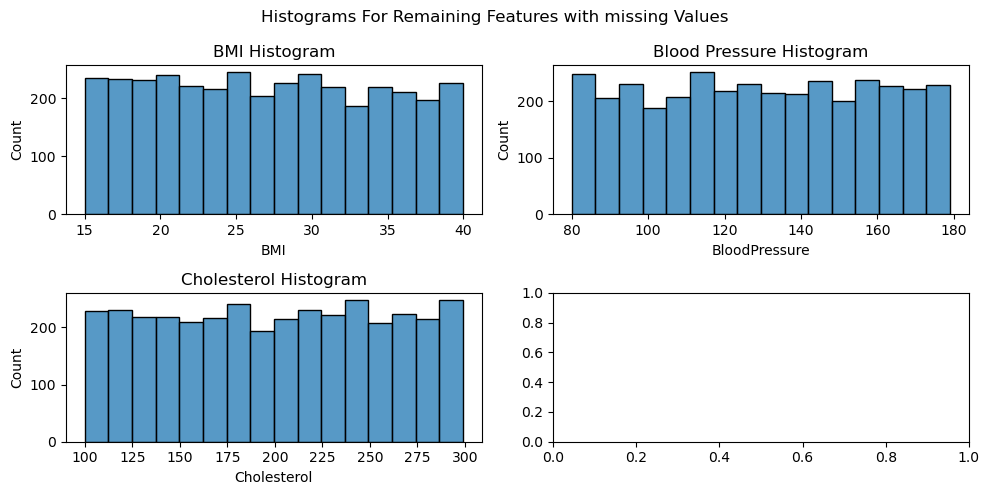

In [15]:
#Histogram grid

fig, axs = plt.subplots(2, 2, figsize=(10, 5))

#Creating histgram to display new PRICE feature data
sns.histplot(data = healthcare["BMI"], x = healthcare["BMI"], ax=axs[0, 0])
           # ,histprops={'color': 'green', 'facecolor': 'red'})
axs[0,0].set_title("BMI Histogram")

#Creating histogram to display new BED feature data
sns.histplot(data = healthcare["BloodPressure"],x = healthcare["BloodPressure"], ax=axs[0, 1])
           # ,histprops={'color': 'black', 'facecolor': 'blue'})
axs[0,1].set_title("Blood Pressure Histogram")

#Creating histogram to display new BATH feature data
sns.histplot(data = healthcare["Cholesterol"],x = healthcare["Cholesterol"], ax=axs[1, 0])
           # ,histprops={'color': 'black', 'facecolor': 'green'})
axs[1,0].set_title("Cholesterol Histogram")

fig.suptitle("Histograms For Remaining Features with missing Values")
plt.tight_layout()
plt.legend([],[], frameon=False)
plt.show()

All the features are evenly spread so I will fill the na values with the mean.

In [16]:
#Store the mean value of the selected features in varibale  
mean_values = healthcare["BMI"].mean()
mean_values1 = healthcare["BloodPressure"].mean()
mean_values2 = healthcare["Cholesterol"].mean()

In [17]:
#Fill the na values with the mean value
healthcare["BMI"].fillna(mean_values, inplace = True)
healthcare["BloodPressure"].fillna(mean_values1, inplace = True)
healthcare["Cholesterol"].fillna(mean_values2, inplace = True)

In [18]:
healthcare.head()
#healthcare.head(50)

,Age,BMI,BloodPressure,Cholesterol,Glucose,Insulin,HeartRate,Smoker,PhysicalActivity,SleepTime,MedicalHistoryScore,IncomeLevel,StressLevel,HealthIns,Disease
0,56,27.577099,88.0,108.0,92,171,75,0,Medium,9,5,High,Low,No,Disease_B
1,69,26.233744,88.0,252.0,102,179,71,0,High,9,3,High,Medium,Yes,Disease_A
2,46,29.646620,152.0,141.0,89,198,90,1,Low,5,5,Medium,Medium,No,Disease_C
3,32,30.619597,106.0,273.0,159,222,64,1,Medium,7,0,Medium,High,No,Disease_C
4,60,16.794395,96.0,172.0,173,30,99,1,Low,7,3,High,Medium,No,Disease_B


In [19]:
#final check for missing values
healthcare.info()
healthcare.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 3742 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  3742 non-null   int64  
 1   BMI                  3742 non-null   float64
 2   BloodPressure        3742 non-null   float64
 3   Cholesterol          3742 non-null   float64
 4   Glucose              3742 non-null   int64  
 5   Insulin              3742 non-null   int64  
 6   HeartRate            3742 non-null   int64  
 7   Smoker               3742 non-null   int64  
 8   PhysicalActivity     3742 non-null   object 
 9   SleepTime            3742 non-null   int64  
 10  MedicalHistoryScore  3742 non-null   int64  
 11  IncomeLevel          3742 non-null   object 
 12  StressLevel          3742 non-null   object 
 13  HealthIns            3742 non-null   object 
 14  Disease              3742 non-null   object 
dtypes: float64(3), int64(7), object(5)
memory u

Age                    0
BMI                    0
BloodPressure          0
Cholesterol            0
Glucose                0
Insulin                0
HeartRate              0
Smoker                 0
PhysicalActivity       0
SleepTime              0
MedicalHistoryScore    0
IncomeLevel            0
StressLevel            0
HealthIns              0
Disease                0
dtype: int64

## CHECKING FOR PRSENCE OF OUTLIERS

MedicalHistoryScore

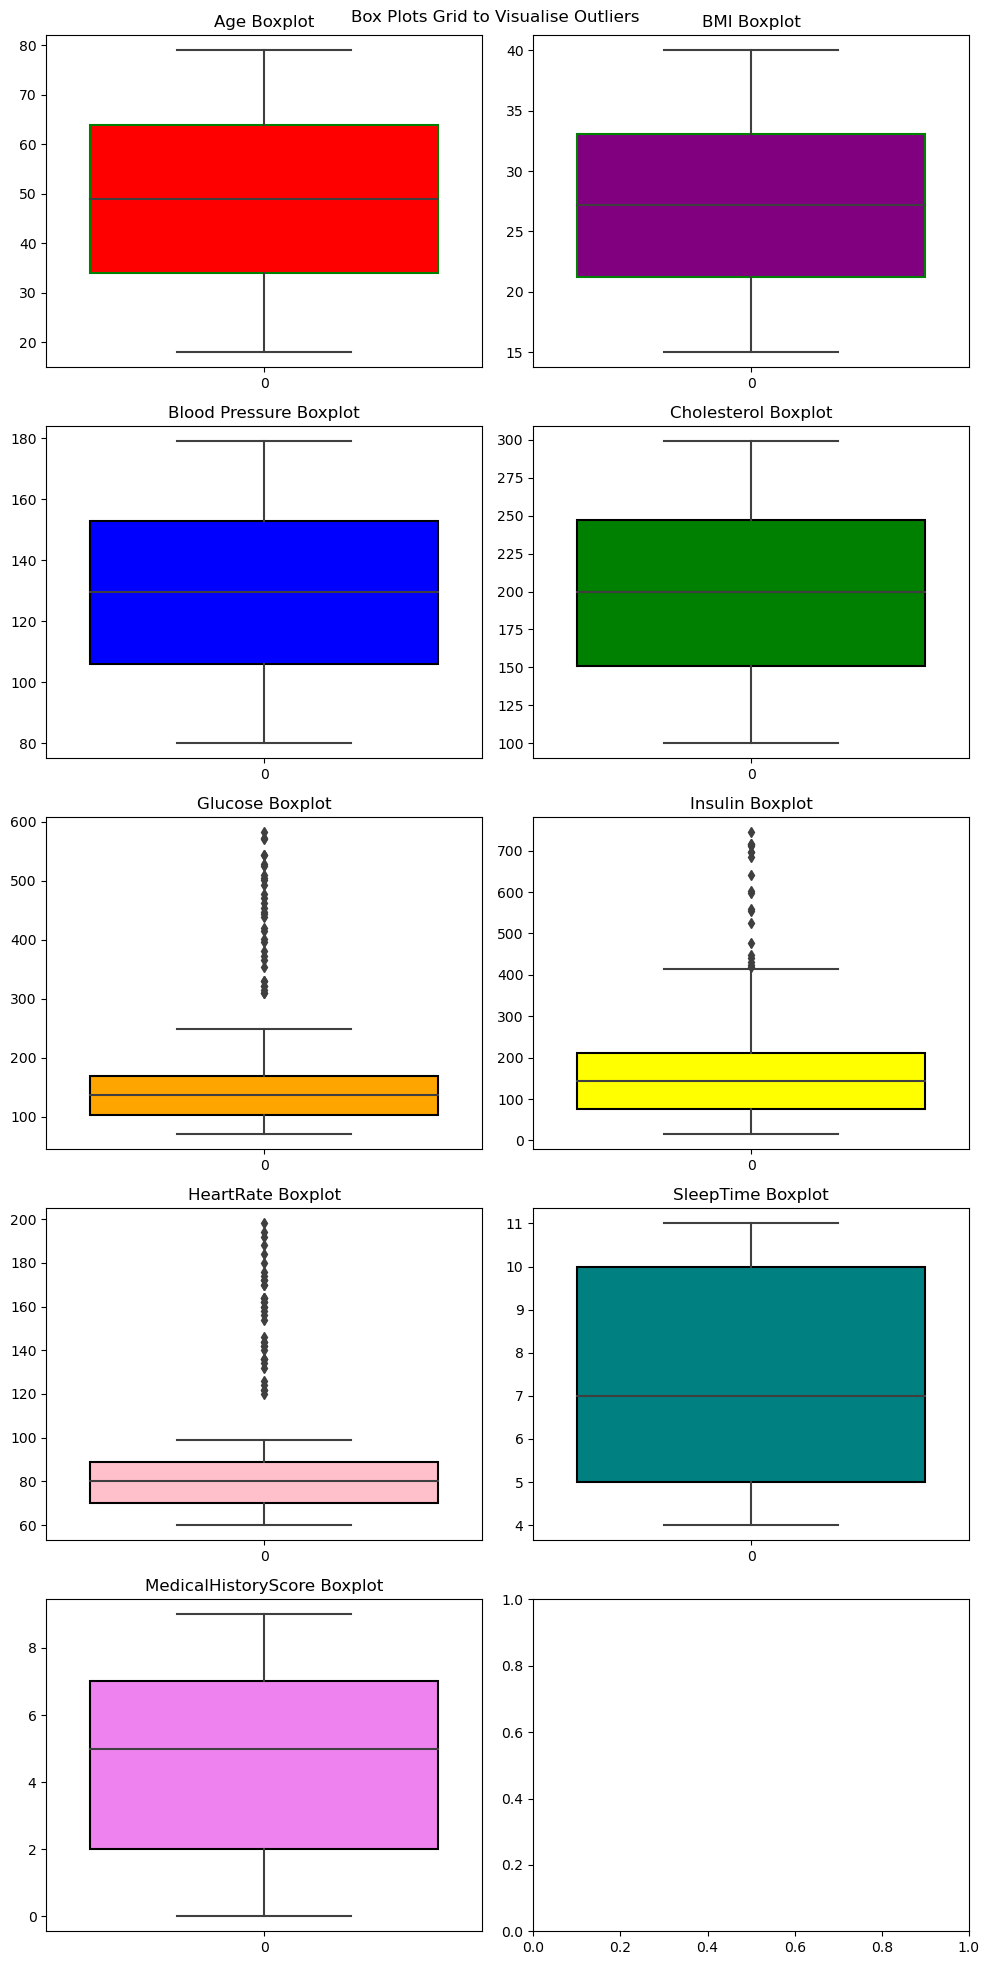

In [20]:
fig, axs = plt.subplots(5, 2, figsize=(10, 20))

#Creating boxplot to display Age feature data
sns.boxplot(data = healthcare["Age"], ax=axs[0, 0]
           ,boxprops={'color': 'green', 'facecolor': 'red'})
axs[0,0].set_title("Age Boxplot")

#Creating boxplot to display BMI feature data
sns.boxplot(data = healthcare["BMI"], ax=axs[0, 1]
           ,boxprops={'color': 'green', 'facecolor': 'purple'})
axs[0,1].set_title("BMI Boxplot")

#Creating boxplot to display BloodPressure feature data
sns.boxplot(data = healthcare["BloodPressure"], ax=axs[1, 0]
           ,boxprops={'color': 'black', 'facecolor': 'blue'})
axs[1,0].set_title("Blood Pressure Boxplot")

#Creating boxplot to display Cholesterol feature data
sns.boxplot(data = healthcare["Cholesterol"], ax=axs[1, 1]
            ,boxprops={'color': 'black', 'facecolor': 'green'})
axs[1,1].set_title("Cholesterol Boxplot")

#Creating boxplot to display Glucose feature data
sns.boxplot(data = healthcare["Glucose"], ax=axs[2, 0]
            ,boxprops={'color': 'black', 'facecolor': 'orange'})
axs[2,0].set_title("Glucose Boxplot")

#Creating boxplot to display Glucose feature data
sns.boxplot(data = healthcare["Insulin"], ax=axs[2, 1]
            ,boxprops={'color': 'black', 'facecolor': 'yellow'})
axs[2,1].set_title("Insulin Boxplot")

#Creating boxplot to display HeartRate feature data
sns.boxplot(data = healthcare["HeartRate"], ax=axs[3, 0]
            ,boxprops={'color': 'black', 'facecolor': 'pink'})
axs[3,0].set_title("HeartRate Boxplot")

#Creating boxplot to display SleepTime feature data
sns.boxplot(data = healthcare["SleepTime"], ax=axs[3, 1]
            ,boxprops={'color': 'black', 'facecolor': 'teal'})
axs[3,1].set_title("SleepTime Boxplot")

#Creating boxplot to display MedicalHistoryScore feature data
sns.boxplot(data = healthcare["MedicalHistoryScore"], ax=axs[4, 0]
            ,boxprops={'color': 'black', 'facecolor': 'violet'})
axs[4,0].set_title("MedicalHistoryScore Boxplot")

fig.suptitle("Box Plots Grid to Visualise Outliers")
plt.tight_layout()
plt.legend([],[], frameon=False)
plt.show()

From examining the box plots I can see are three columns where outliers are present:

Insulin,
Glucose,
Sleep time.

To get a further picture of these features I will use histograms.

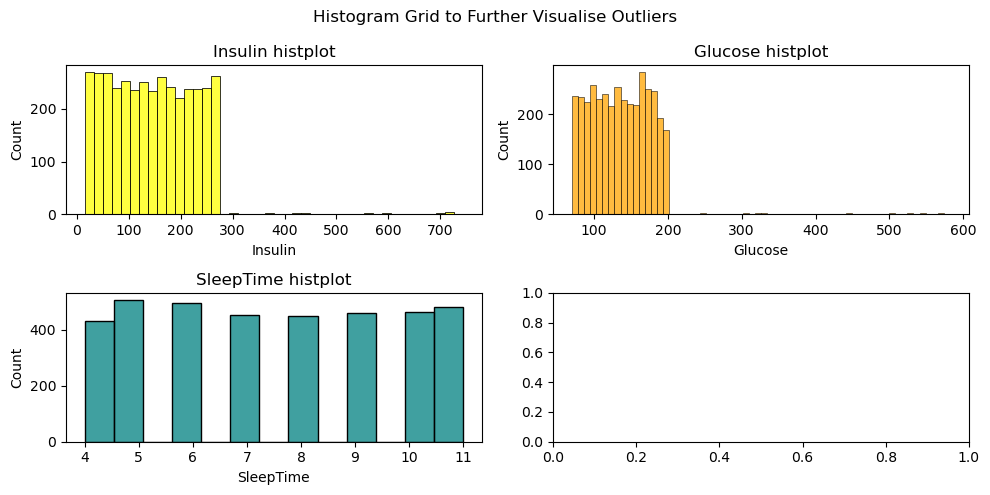

In [21]:
fig, axs = plt.subplots(2, 2, figsize=(10, 5))

#Creating histplot to display Age feature data
sns.histplot(data = healthcare["Insulin"], ax=axs[0, 0],color='yellow')
axs[0,0].set_title("Insulin histplot")

#Creating boxplot to display BMI feature data
sns.histplot(data = healthcare["Glucose"], ax=axs[0, 1],color='orange')           
axs[0,1].set_title("Glucose histplot")

#Creating boxplot to display BloodPressure feature data
sns.histplot(data = healthcare["SleepTime"], ax=axs[1, 0],color='teal')
axs[1,0].set_title("SleepTime histplot")

fig.suptitle("Histogram Grid to Further Visualise Outliers")
plt.tight_layout()
plt.legend([],[], frameon=False)
plt.show()

In [22]:
healthcare["Insulin"].describe()
healthcare["Glucose"].describe()

count    3742.000000
mean      137.500534
std        47.379593
min        70.000000
25%       103.000000
50%       136.000000
75%       168.000000
max       582.000000
Name: Glucose, dtype: float64

### Attempting to use the IQR to  remove outliers. I decided against using it so i commented out the code. 

In [23]:
# low_quartile_Insulin = healthcare["Insulin"].quantile(0.25)
# high_quartile_Insulin = healthcare["Insulin"].quantile(0.75)
# interQrange_Insulin = high_quartile_Insulin - low_quartile_Insulin
# interQrange_Insulin

In [24]:
# #Calculating 1.5 * IQR to determine how many outliers are present in each feature.

# low_quartile_Glucose = healthcare["Glucose"].quantile(0.25)
# high_quartile_Glucose = healthcare["Glucose"].quantile(0.75)

# interQrange_Glucose = high_quartile_Glucose - low_quartile_Glucose

# #testing if equation is working
# interQrange_Glucose
# #high_quartile

In [25]:
# high_rangeValue_Insulin = high_quartile_Insulin + 1.5 * interQrange_Insulin
# high_rangeValue_Insulin

In [26]:
# #Define high range value glucose
# high_rangeValue_Glucose = high_quartile_Glucose + 1.5 * interQrange_Glucose
# high_rangeValue_Glucose
# #low_rangeValue

In [27]:
# #How many observataions are there over the the high range value

# rowsOver_high_rangeValue_Insulin = (healthcare["Insulin"] > high_rangeValue_Insulin).sum()

# print(rowsOver_high_rangeValue_Insulin)
# #rowsOver_high_rangeValue["Insulin"].describe()

In [28]:
# rowsOver_high_rangeValue_Insulin = (healthcare["Insulin"] > high_rangeValue_Insulin).sum()

# print(rowsOver_high_rangeValue_Insulin)
# #rowsOver_high_rangeValue["Insulin"].describe()

In [29]:
# healthcare_clean = healthcare[(healthcare["Insulin"] < high_rangeValue_Insulin)]

In [30]:
#  #Creating histplot to display Age feature data
#  sns.histplot(data = healthcare_clean["Insulin"],color='yellow')
#  plt.show()

In [31]:
#healthcare_clean = healthcare[(healthcare["Glucose"] < high_rangeValue_Glucose)]

In [32]:
#  #Creating histplot to display Age feature data
#  sns.histplot(data = healthcare_clean["Glucose"],color='orange')
#  plt.show()

In [33]:
#healthcare_clean.isnull().sum()
#healthcare_clean.shape

In [34]:
#healthcare_clean.head()

In [35]:
#Renaming features before encoding to make it easier to navigate as one hot encoding adds new features
healthcare_clean_1 = healthcare.rename(columns={'HealthIns': 'Health_Insurance'})

In [36]:
healthcare_clean_1.dropna(inplace = True)

In [37]:
healthcare_clean_1.shape

(3742, 15)

## Scaling, Encoding and Feature Engineering

In [38]:
#One hot encoding various features
#I am using one hot encoding because it avoids ordinality and creates better moedel accuracy in certain models.
#Can lead to sparse data so need to be careful
features_toEncode = ['PhysicalActivity', 'IncomeLevel', 'StressLevel', 'Health_Insurance']

#Storing the new a new dataset of encoded values in feature_new
encoder = OneHotEncoder()
fresh_features = encoder.fit_transform(healthcare_clean_1[features_toEncode])

#I am using .get_feature_names_out to retrieve the names of the features after encoding anbd store them in a variable.
column_heading = encoder.get_feature_names_out(features_toEncode)
print(column_heading)

['PhysicalActivity_High' 'PhysicalActivity_Low' 'PhysicalActivity_Medium'
 'IncomeLevel_High' 'IncomeLevel_Low' 'IncomeLevel_Medium'
 'StressLevel_High' 'StressLevel_Low' 'StressLevel_Medium'
 'Health_Insurance_No' 'Health_Insurance_Yes']


In [39]:
#Making a new data frame with the new encoded features and converting them from sparser to dense array using toarray()
healthcare_clean_1_new = pd.DataFrame(fresh_features.toarray(), columns = column_heading)

In [40]:
#Joining both dataframes together using concatenate and dropping any Nan
healthcare_clean_1 = pd.concat([healthcare_clean_1, healthcare_clean_1_new], axis = 1)
healthcare_clean_1.dropna(inplace = True)

In [41]:
healthcare_clean_1.isnull().sum()

Age                        0
BMI                        0
BloodPressure              0
Cholesterol                0
Glucose                    0
Insulin                    0
HeartRate                  0
Smoker                     0
PhysicalActivity           0
SleepTime                  0
MedicalHistoryScore        0
IncomeLevel                0
StressLevel                0
Health_Insurance           0
Disease                    0
PhysicalActivity_High      0
PhysicalActivity_Low       0
PhysicalActivity_Medium    0
IncomeLevel_High           0
IncomeLevel_Low            0
IncomeLevel_Medium         0
StressLevel_High           0
StressLevel_Low            0
StressLevel_Medium         0
Health_Insurance_No        0
Health_Insurance_Yes       0
dtype: int64

In [42]:
#Dropping original featuires as they are no longer relevant to the dataset
healthcare_clean_1.drop(columns = ['PhysicalActivity', 'IncomeLevel', 'StressLevel', 'Health_Insurance'], inplace = True)

In [43]:
#Label encoding the target feature as Ml model cant learn on string data.
#must be numerical
encoder1 = LabelEncoder()
healthcare_clean_1["Disease"] = encoder1.fit_transform(healthcare_clean_1["Disease"])

In [44]:
#Converting to integers
integer_conversion = [healthcare_clean_1.columns]

for values in integer_conversion:
    healthcare_clean_1[values]=healthcare_clean_1[values].astype(int)

In [45]:
# #Converting to integers
# import sklearn.preprocessing as preproc
# scaling_feats = [healthcare_clean_1.columns]

# for features in scaling_feats:
#     healthcare_clean_1[features]= preproc.StandardScaler().fit_transform(healthcare_clean_1[[features]])

In [46]:
#Attempting to scale pre LDA and PCA

healthcare_scaled_notarget = healthcare_clean_1.drop(columns = "Disease")

from sklearn.preprocessing import StandardScaler
columns = [healthcare_scaled_notarget.columns]

data = healthcare_scaled_notarget.values

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

healthcare_clean_scaled = pd.DataFrame(data_scaled, columns = columns)

In [47]:
#show all the columns
pd.set_option("display.max_columns", None)
healthcare_clean_1.head()
#healthcare_clean_scaled.head()

,Age,BMI,BloodPressure,Cholesterol,Glucose,Insulin,HeartRate,Smoker,SleepTime,MedicalHistoryScore,Disease,PhysicalActivity_High,PhysicalActivity_Low,PhysicalActivity_Medium,IncomeLevel_High,IncomeLevel_Low,IncomeLevel_Medium,StressLevel_High,StressLevel_Low,StressLevel_Medium,Health_Insurance_No,Health_Insurance_Yes
0,56,27,88,108,92,171,75,0,9,5,1,0,0,1,1,0,0,0,1,0,1,0
1,69,26,88,252,102,179,71,0,9,3,0,1,0,0,1,0,0,0,0,1,0,1
2,46,29,152,141,89,198,90,1,5,5,2,0,1,0,0,0,1,0,0,1,1,0
3,32,30,106,273,159,222,64,1,7,0,2,0,0,1,0,0,1,1,0,0,1,0
4,60,16,96,172,173,30,99,1,7,3,1,0,1,0,1,0,0,0,0,1,1,0


In [48]:
#new dataset shape.
#almost half the observations gone
healthcare_clean_scaled.shape

(2791, 21)

## LDA vs PCA

In [49]:
healthcare_clean_1["Disease"].unique()

array([1, 0, 2])

In [50]:
#Linear Discriminent Analysis
Independants = healthcare_clean_1.drop(columns = "Disease")
Target = healthcare_clean_1["Disease"]

In [51]:
#X.head()
Target

0       1
1       0
2       2
3       2
4       1
       ..
3735    0
3736    0
3738    2
3739    2
3741    1
Name: Disease, Length: 2791, dtype: int64

## Linear Discriminent Analysis

In [52]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda=LinearDiscriminantAnalysis()
X_lda=lda.fit_transform(Independants,Target)

In [53]:
#Returns number of classes minus 1. 
#There are four classes in the disease columns, therefore LDA has returned 3 new features
X_lda.shape

(2791, 2)

In [54]:
lda.explained_variance_ratio_

array([0.77339275, 0.22660725])

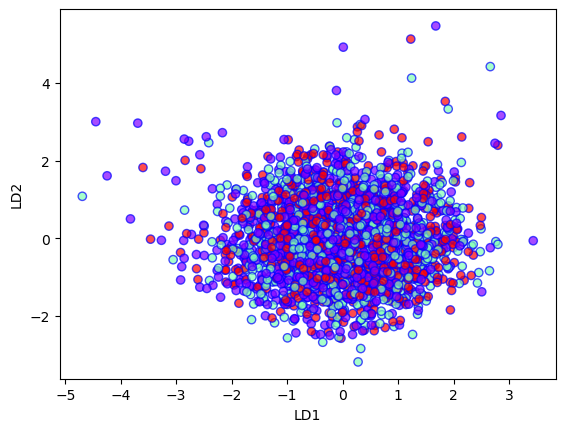

In [55]:
plt.xlabel("LD1")
plt.ylabel("LD2")
plt.scatter(x=X_lda[:,0],
           y=X_lda[:,1],
           c=Target,
           cmap="rainbow",
           alpha=0.7,
           edgecolors="b")

## Principal Component Analysis

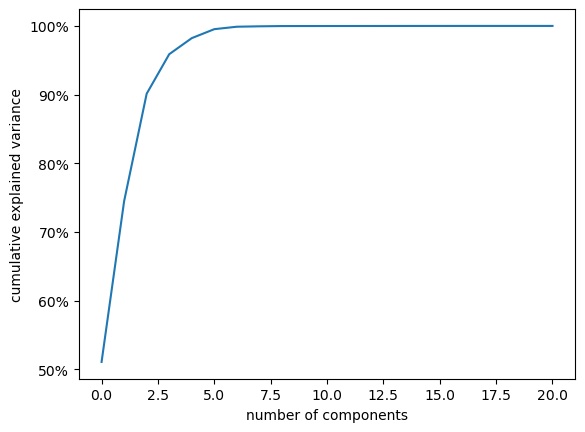

In [56]:
#creating graph to see how how many components i will use going forward. Ie., how many features am i keeping?
from sklearn.decomposition import PCA
import matplotlib.ticker as mtick
pca = PCA().fit(Independants) 
plt.plot(np.cumsum(pca.explained_variance_ratio_)) 
plt.xlabel('number of components') 
plt.ylabel('cumulative explained variance');
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))

In [57]:
#Principal component analysis
#I have to use 2 features for PCA so I can accuratley test it against LDA
#In this case, 2 features only accounts for around 90% of the variance
pca = PCA(2)
X_pca=pca.fit_transform(Independants)

In [58]:
X_pca.shape

(2791, 2)

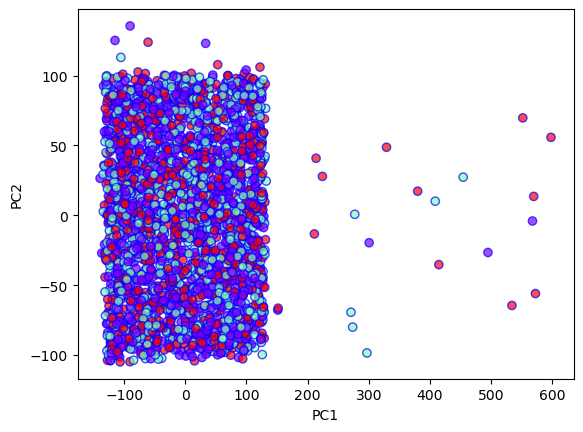

In [59]:
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.scatter(x=X_pca[:,0],
           y=X_pca[:,1],
           c=Target,
           cmap="rainbow",
           alpha=0.7,
           edgecolors="b")

## LDA / PCA Summary

Both Alogorhythms have not classifed the decision boundaries effectively.

LDA and PCA are both linear techniques to reduce dimensionality. The true decision boundaries of the data may be non linear.

This will effect the ML model I will employ as I will need to pick a model that handles non-linearity well. 

=========================================================================================================

# Statistical Techniques

## Descriptive Analysis

In [60]:
data = pd.DataFrame(healthcare, columns = healthcare.columns)

In [61]:
#Data description
data.describe()

,Age,BMI,BloodPressure,Cholesterol,Glucose,Insulin,HeartRate,Smoker,SleepTime,MedicalHistoryScore
count,3742.000000,3742.000000,3742.000000,3742.000000,3742.000000,3742.000000,3742.000000,3742.000000,3742.000000,3742.000000
mean,48.911545,27.223782,129.642395,199.975849,137.500534,145.827900,80.327632,0.505077,7.501871,4.510422
std,18.012023,7.036392,28.019617,56.673047,47.379593,83.419468,13.898978,0.500041,2.292293,2.853600
min,18.000000,15.000768,80.000000,100.000000,70.000000,15.000000,60.000000,0.000000,4.000000,0.000000
25%,34.000000,21.224621,106.000000,151.000000,103.000000,76.000000,70.000000,0.000000,5.000000,2.000000
50%,49.000000,27.223782,129.642395,199.975849,136.000000,143.000000,80.000000,1.000000,7.000000,5.000000
75%,64.000000,33.068105,153.000000,247.000000,168.000000,212.000000,89.000000,1.000000,10.000000,7.000000
max,79.000000,39.988943,179.000000,299.000000,582.000000,744.000000,198.000000,1.000000,11.000000,9.000000


In [62]:
data.head()

,Age,BMI,BloodPressure,Cholesterol,Glucose,Insulin,HeartRate,Smoker,PhysicalActivity,SleepTime,MedicalHistoryScore,IncomeLevel,StressLevel,HealthIns,Disease
0,56,27.577099,88.0,108.0,92,171,75,0,Medium,9,5,High,Low,No,Disease_B
1,69,26.233744,88.0,252.0,102,179,71,0,High,9,3,High,Medium,Yes,Disease_A
2,46,29.646620,152.0,141.0,89,198,90,1,Low,5,5,Medium,Medium,No,Disease_C
3,32,30.619597,106.0,273.0,159,222,64,1,Medium,7,0,Medium,High,No,Disease_C
4,60,16.794395,96.0,172.0,173,30,99,1,Low,7,3,High,Medium,No,Disease_B


In [63]:
#Probibilites 
probililities_disease = data["Disease"].value_counts(normalize = True)
probililities_PhysAct = data["PhysicalActivity"].value_counts(normalize = True)
probililities_Income = data["IncomeLevel"].value_counts(normalize = True)

print("Disease Type Probability:" , probililities_disease)
print("\n")
print("Physical Activity Probability:" , probililities_PhysAct)
print("\n")
print("Income Probability:" , probililities_Income)

Disease Type Probability: Disease
Disease_B    0.336184
Disease_A    0.331908
Disease_C    0.331908
Name: proportion, dtype: float64


Physical Activity Probability: PhysicalActivity
Medium    0.348744
Low       0.325762
High      0.325494
Name: proportion, dtype: float64


Income Probability: IncomeLevel
Medium    0.333779
Low       0.333511
High      0.332710
Name: proportion, dtype: float64


In [64]:
#dropping categorical features to to obtain central tendancies of numerical features
numerical = data.drop(columns =["PhysicalActivity", "IncomeLevel", "StressLevel", "HealthIns", "Disease"])

In [65]:
#declaring central tendancy variables
mean_values = numerical.mean()
median_values = numerical.median()
mode_values = numerical.mode().iloc[0]

#making a dataframe containing all the central tendancy values for the dataset
central_tendancy_data = pd.DataFrame({
    "Mean" : mean_values,
    "Median" : median_values,
    "mode_values" : mode_values
})

central_tendancy_data.head(11)

,Mean,Median,mode_values
Age,48.911545,49.000000,66.000000
BMI,27.223782,27.223782,27.223782
BloodPressure,129.642395,129.642395,129.642395
Cholesterol,199.975849,199.975849,199.975849
Glucose,137.500534,136.000000,117.000000
Insulin,145.827900,143.000000,51.000000
HeartRate,80.327632,80.000000,64.000000
Smoker,0.505077,1.000000,1.000000
SleepTime,7.501871,7.000000,5.000000
MedicalHistoryScore,4.510422,5.000000,3.000000


In [66]:
#Variation metrics
varicance_values = numerical.var()
std_dev_values = numerical.std()
range_values = numerical.max() - numerical.min()

variation_metrics_data = pd.DataFrame({
    "Variance" : varicance_values,
    "Standard Deviation" : std_dev_values,
    "Range" : range_values
})

variation_metrics_data.head(11)

,Variance,Standard Deviation,Range
Age,324.432965,18.012023,61.000000
BMI,49.510811,7.036392,24.988175
BloodPressure,785.098938,28.019617,99.000000
Cholesterol,3211.834248,56.673047,199.000000
Glucose,2244.825848,47.379593,512.000000
Insulin,6958.807583,83.419468,729.000000
HeartRate,193.181589,13.898978,138.000000
Smoker,0.250041,0.500041,1.000000
SleepTime,5.254608,2.292293,7.000000
MedicalHistoryScore,8.143035,2.853600,9.000000


## Visualisations

#### Age Distribution

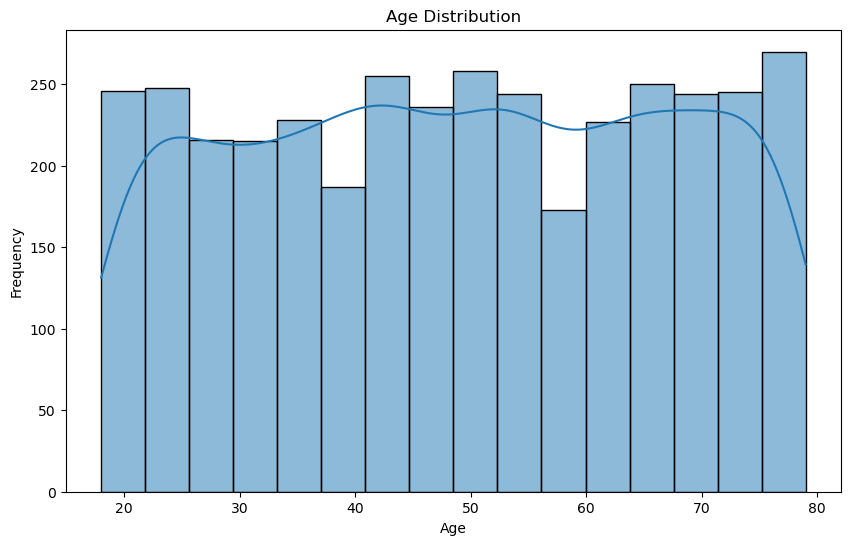

In [67]:
#Age distribution histogram
plt.figure(figsize = (10,6))
sns.histplot(data["Age"], kde = True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

#### Distribution of Disease Types

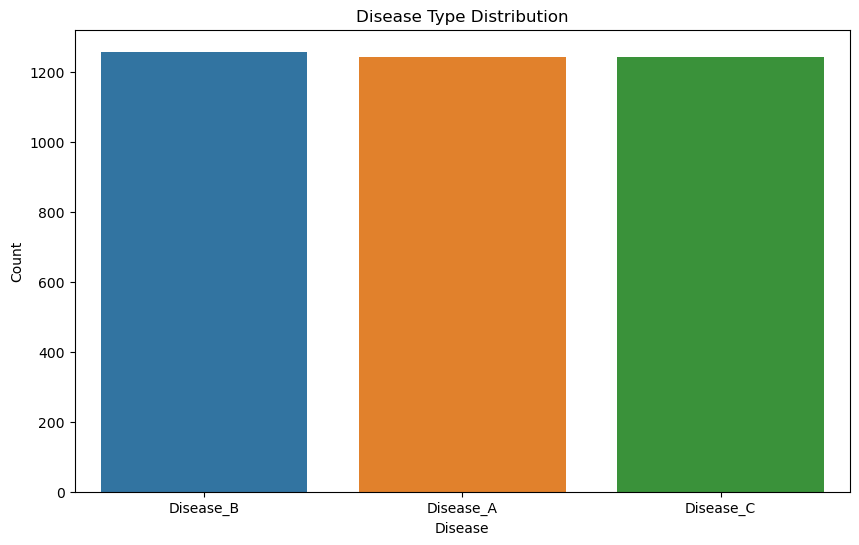

In [68]:
#Disease distribution
plt.figure(figsize = (10,6))
sns.countplot(x = 'Disease', data = data)
plt.title("Disease Type Distribution")
plt.xlabel("Disease")
plt.ylabel("Count")
plt.show()

#### Smoker by BMI

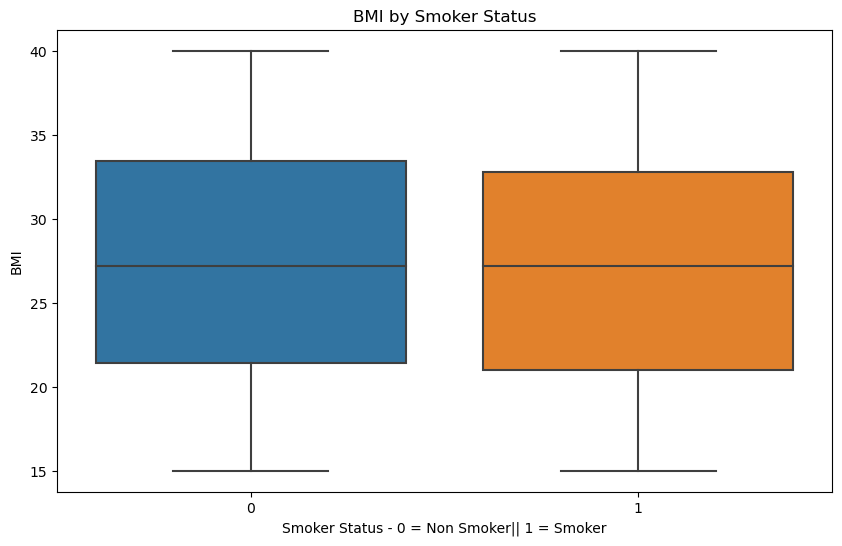

In [69]:
plt.figure(figsize = (10,6))
sns.boxplot(x = 'Smoker', y = 'BMI', data = data)
plt.title("BMI by Smoker Status")
plt.xlabel("Smoker Status - 0 = Non Smoker|| 1 = Smoker")
plt.ylabel("BMI")
plt.show()

## T test to establish BMI in smokers

In [70]:
import scipy.stats as stats
from statsmodels.stats import weightstats

#Seperating out the smokers and non smoker into seperate datasets
smoker_data = data[data["Smoker"] == 1].dropna(subset=["BMI"])
Non_smoker_data = data[data["Smoker"] == 0].dropna(subset=["BMI"])
#smoker_data["Smoker"].unique()
Non_smoker_data["Smoker"].unique()

array([0])

In [71]:
#storing all the BMI values bin a list based on if they smoke or not

smoker_BMI = smoker_data["BMI"]
non_smoker_BMI = Non_smoker_data["BMI"]

non_smoker_BMI
#smoker_BMI.head()

0       27.577099
1       26.233744
6       21.048292
9       35.098963
12      18.571899
          ...    
4979    31.594791
4983    37.352488
4986    35.516039
4988    24.179241
4989    28.557499
Name: BMI, Length: 1852, dtype: float64

In [72]:
#Comparing BMI between smokers and non smokers
t_score, p_value = stats.ttest_ind(smoker_BMI, non_smoker_BMI)

print("Hypothesis Test 1 - BMI Between Smokers and Non Smokers:")
print("\n")
print(f"T_score =  {t_score}")
print(f"P_value = {p_value}")
print("\n")
    
if p_value < 0.05:
        print("At a 5% significance, there is enough evidence to suggest a differnce in BMI between smokers and non smokers")
else:
        print("At a 5% significance, there is no evidence to suggest a differnce in BMI between smokers and non smokers")


Hypothesis Test 1 - BMI Between Smokers and Non Smokers:


T_score =  -1.1376277692536851
P_value = 0.2553488208010552


At a 5% significance, there is no evidence to suggest a differnce in BMI between smokers and non smokers


## Comparing Chosesterol Between Income Levels using Anova

### CHECKING NORMAL DISTRIBUTION

<Figure size 640x480 with 0 Axes>

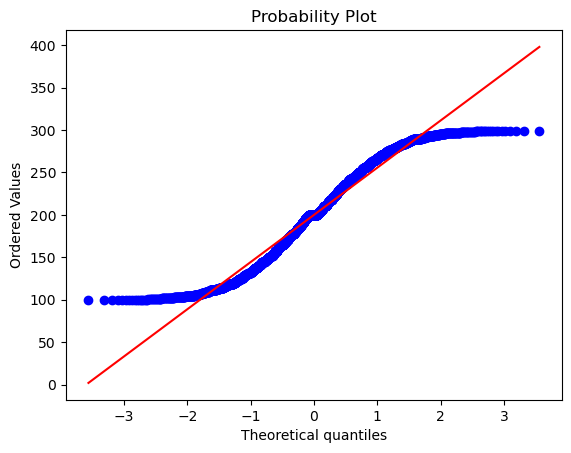

<Figure size 640x480 with 0 Axes>

In [73]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

#Checking for Normal Distribution in Cholesterol
stats.probplot(data.Cholesterol, plot = plt)
plt.figure()

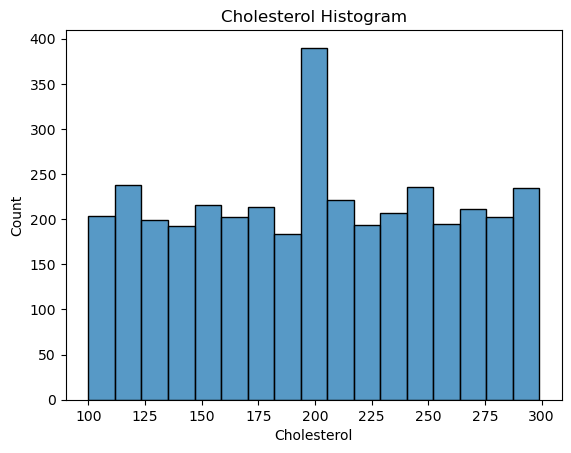

In [74]:
#Checking for Normal Distribution in Cholesterol - seems well distributed

#Creating histogram to display new BATH feature data
sns.histplot(data = healthcare["Cholesterol"],x = healthcare["Cholesterol"])
           # ,histprops={'color': 'black', 'facecolor': 'green'})
plt.title("Cholesterol Histogram")
plt.show()

### SHAPIRO AND LEVENE TEST

In [75]:
data["IncomeLevel"].unique()

array(['High', 'Medium', 'Low'], dtype=object)

In [76]:
stats.shapiro(data.Cholesterol)

ShapiroResult(statistic=0.9605591297149658, pvalue=9.279603490984473e-31)

In [77]:
HighIncome = data.Cholesterol[data.IncomeLevel == "High"]

In [78]:
MediumIncome = data.Cholesterol[data.IncomeLevel == "Medium"]

In [79]:
LowIncome = data.Cholesterol[data.IncomeLevel == "Low"]

In [80]:
from scipy.stats import levene
levene_test = levene(HighIncome,MediumIncome,LowIncome, center = 'mean')
levene_test

LeveneResult(statistic=0.8029856684717961, pvalue=0.4480666572824229)

### ANOVA TEST

In [81]:
from statsmodels.stats.anova import anova_lm
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy as scipy

model = ols("Cholesterol ~ IncomeLevel", data=data).fit()
anova_table = sm.stats.anova_lm(model)

anova_table

,df,sum_sq,mean_sq,F,PR(>F)
IncomeLevel,2.0,1.063650e+04,5318.251103,1.656411,0.190963
Residual,3739.0,1.200484e+07,3210.707521,NaN,NaN


In [82]:
if anova_table["PR(>F)"][0] < 0.05:
    print("There is significant difference in Cholesterol Levels between Income Levels")
else:
        print("There is no significant difference in Cholesterol Levels between Income Levels")


There is no significant difference in Cholesterol Levels between Income Levels


### T-test to test averge Heart Rate

In [83]:
#mean/avergae of heart rate
mu = 80.327632
test = data["HeartRate"]

In [84]:
t_score, p_value = stats.ttest_1samp(test, mu)
t_score

1.2420216622073153e-06

In [85]:
p_value

0.9999990090763142

In [86]:
if p_value > 0.05:
    print("With a 5% significance, the average heart rate is 80.327632")
else:
    print("The average is not 80.327632")

With a 5% significance, the average heart rate is 80.327632


## Correlation Analysis

#### Correlation using numerical data only

In [87]:
corelation_matrix = numerical.corr()
corelation_matrix.head()

,Age,BMI,BloodPressure,Cholesterol,Glucose,Insulin,HeartRate,Smoker,SleepTime,MedicalHistoryScore
Age,1.000000,0.010656,0.013462,0.017899,0.002223,0.002477,0.000462,-0.029258,0.014425,0.000135
BMI,0.010656,1.000000,0.013258,-0.002985,0.000597,-0.021741,0.010123,-0.018599,-0.003582,0.011457
BloodPressure,0.013462,0.013258,1.000000,-0.001003,0.001393,0.027030,0.008119,-0.009857,-0.002009,0.002300
Cholesterol,0.017899,-0.002985,-0.001003,1.000000,0.042184,0.002439,-0.002459,-0.028075,0.040483,0.015431
Glucose,0.002223,0.000597,0.001393,0.042184,1.000000,-0.051365,0.001466,0.032833,-0.017147,0.006732


Text(0.5, 1.0, 'Correlation Heat Map of Numerical Features')

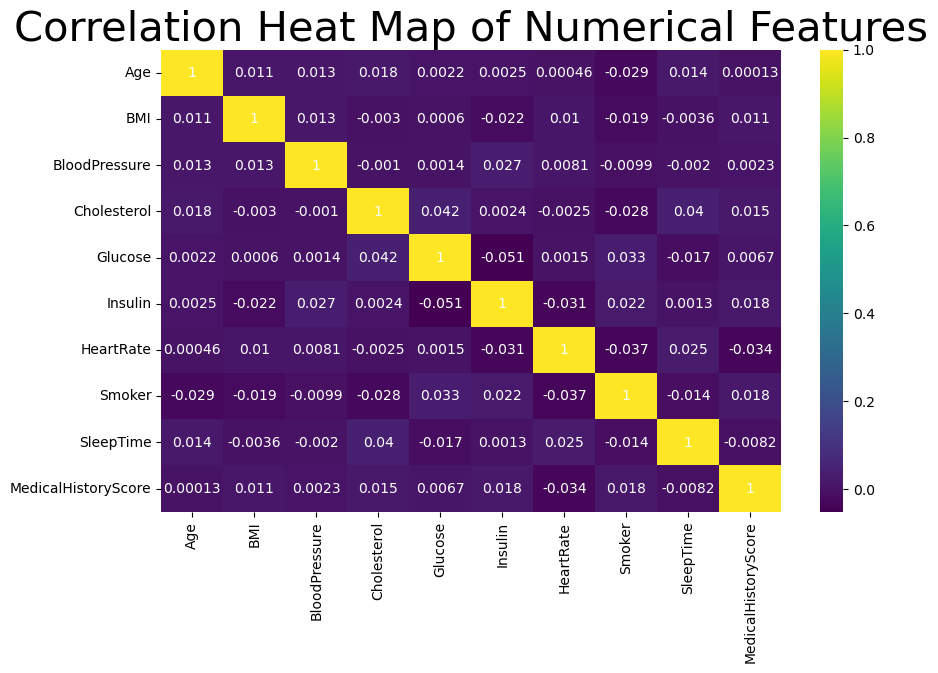

In [88]:
#create heatmap containing correlation matrix between features  
plt.figure(figsize=(10,6))
sns.heatmap(numerical.corr(), annot=True, cmap = "viridis",annot_kws={'color': 'white'} )
plt.title("Correlation Heat Map of Numerical Features", fontsize=30)

### Correlation using all features

In [89]:
#dataset for correlation map containing all features
data_corr = pd.DataFrame(data, columns = data.columns)
data_corr.head()

,Age,BMI,BloodPressure,Cholesterol,Glucose,Insulin,HeartRate,Smoker,PhysicalActivity,SleepTime,MedicalHistoryScore,IncomeLevel,StressLevel,HealthIns,Disease
0,56,27.577099,88.0,108.0,92,171,75,0,Medium,9,5,High,Low,No,Disease_B
1,69,26.233744,88.0,252.0,102,179,71,0,High,9,3,High,Medium,Yes,Disease_A
2,46,29.646620,152.0,141.0,89,198,90,1,Low,5,5,Medium,Medium,No,Disease_C
3,32,30.619597,106.0,273.0,159,222,64,1,Medium,7,0,Medium,High,No,Disease_C
4,60,16.794395,96.0,172.0,173,30,99,1,Low,7,3,High,Medium,No,Disease_B


In [90]:
categorical_features = data_corr[["PhysicalActivity", 
                                "IncomeLevel",
                                "StressLevel",
                                "HealthIns",
                               "Disease",
                               ]]

In [91]:
#Here im using a for loop to encode the categorical features so they can used in the correlation map

from sklearn.preprocessing import LabelEncoder
encoder3 = LabelEncoder()
for cat in categorical_features:
    data_corr[cat] = encoder3.fit_transform(data_corr[cat])

Text(0.5, 1.0, 'Correlation Heat Map Containing All Features')

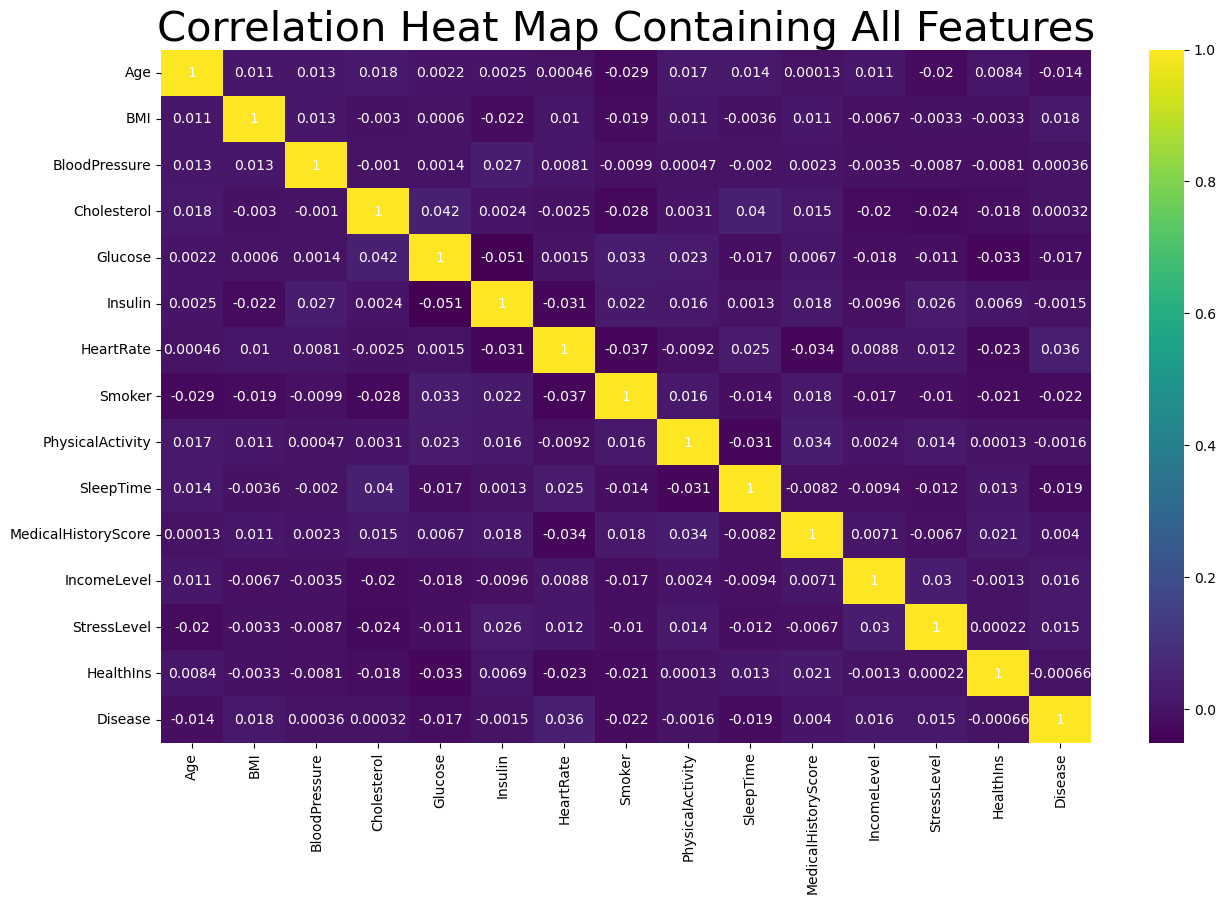

In [92]:
#create heatmap containing correlation matrix between features  
plt.figure(figsize=(15,9))
sns.heatmap(data_corr.corr(), annot=True, cmap = "viridis",annot_kws={'color': 'white'} )
plt.title("Correlation Heat Map Containing All Features", fontsize=30)

# Machine Learning

### The model I will focus on for this Multi-class classification task is Random Forrest Cloassifier as it is robust to non-linear data.

I will try the random forest classifier on the PCA, LDA and the original dataset before dimensionality reduction to see what yields the best results before attempting kfolds and train test split sizes.

### Model using PCA

In [93]:
PCA_data = pd.DataFrame(X_pca, columns = ["C1", "C2"])
PCA_data.head()

,C1,C2
0,27.316002,-95.361016
1,33.852803,49.063275
2,54.793388,-62.442694
3,73.756084,75.603906
4,-118.098996,-25.666039


In [94]:
X_data_pca = PCA_data
y_data_pca = healthcare_clean_1["Disease"]

In [95]:
#Loading the appropiate libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier

In [96]:
# random_state is the seed used by the random number generator, it can be any integer.
# Splitting data into testing and training. First I will employ an 70/30 split. 70% training and 30% testing

X_train, X_test, y_train, y_test = train_test_split(X_data_pca, y_data_pca, train_size = 0.70 , random_state = 42)

X_data_pca.shape, y_data_pca.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2791, 2), (2791,), (1953, 2), (838, 2), (1953,), (838,))

In [97]:
rf_model_PCA = RandomForestClassifier(random_state = 42)


# Fit the model using rf_model.fit()
rf_model_PCA.fit(X_train, y_train)
y_pred = rf_model_PCA.predict(X_test)

In [98]:
print("Random Forrest Training PCA set score: {:.2f}".format(rf_model_PCA.score(X_train, y_train)))
print("Random Forrest Test set PCA score: {:.2f}".format(rf_model_PCA.score(X_test, y_test)))

Random Forrest Training PCA set score: 1.00
Random Forrest Test set PCA score: 0.32


### Model using LDA

In [99]:
LDA_data = pd.DataFrame(X_lda, columns = ["C1", "C2"])
LDA_data.head()

,C1,C2
0,0.728268,1.381024
1,0.446876,-0.392247
2,0.378299,-0.200204
3,0.135430,-0.150737
4,-0.681962,0.816757


In [100]:
X_data_LDA = PCA_data
y_data_LDA = Target

In [101]:
# random_state is the seed used by the random number generator, it can be any integer.
# Splitting data into testing and training. First I will employ an 70/30 split. 70% training and 30% testing

X_train, X_test, y_train, y_test = train_test_split(X_data_LDA, y_data_LDA, train_size = 0.70 , random_state = 42)

X_data_LDA.shape, y_data_LDA.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2791, 2), (2791,), (1953, 2), (838, 2), (1953,), (838,))

In [102]:
rf_model_LDA = RandomForestClassifier(random_state = 42)


# Fit the model using rf_model.fit()
rf_model_LDA.fit(X_train, y_train)
y_pred = rf_model_LDA.predict(X_test)

In [103]:
print("Random Forrest Training LDA set score: {:.2f}".format(rf_model_LDA.score(X_train, y_train)))
print("Random Forrest Test set LDA score: {:.2f}".format(rf_model_LDA.score(X_test, y_test)))

Random Forrest Training LDA set score: 1.00
Random Forrest Test set LDA score: 0.32


## Original Dataset

In [104]:
X_Original = healthcare_clean_1.drop(columns = "Disease")
y_Original = healthcare_clean_1["Disease"]

In [105]:
# random_state is the seed used by the random number generator, it can be any integer.
# Splitting data into testing and training. First I will employ an 70/30 split. 70% training and 30% testing

X_train, X_test, y_train, y_test = train_test_split(X_Original, y_Original, train_size = 0.70 , random_state = 42)

X_data_LDA.shape, y_data_LDA.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2791, 2), (2791,), (1953, 21), (838, 21), (1953,), (838,))

In [106]:
rf_model_Orig = RandomForestClassifier(random_state = 42)


# Fit the model using rf_model.fit()
rf_model_Orig.fit(X_train, y_train)
y_pred = rf_model_Orig.predict(X_test)

In [107]:
print("Random Forrest Training Original Data set score: {:.2f}".format(rf_model_Orig.score(X_train, y_train)))
print("Random Forrest Test set Original Data score: {:.2f}".format(rf_model_Orig.score(X_test, y_test)))

Random Forrest Training Original Data set score: 1.00
Random Forrest Test set Original Data score: 0.33


## Feature Importances

In [108]:
#Random Forest Feature Importance
#I'm making a new dataframe to display the feature imporatnces in bar chart
importance = rf_model_Orig.feature_importances_
feature_importances = pd.DataFrame({"Feature": X_Original.columns,"Importance":importance}).sort_values(by= "Importance", ascending = False)

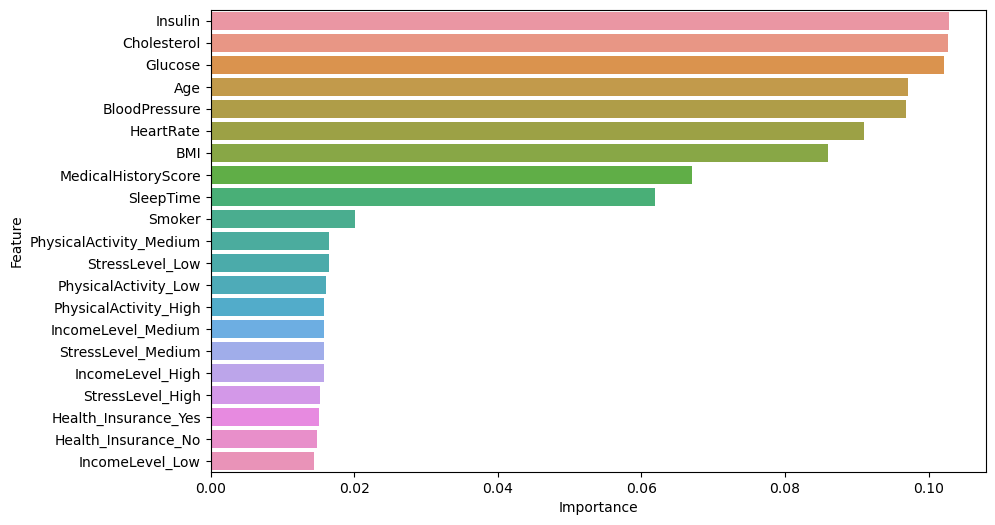

In [109]:
plt.figure(figsize = (10,6))
sns.barplot(x = "Importance", y = "Feature", data = feature_importances)
plt.show()

In [110]:
feature_importances["Feature"].unique()

array(['Insulin', 'Cholesterol', 'Glucose', 'Age', 'BloodPressure',
       'HeartRate', 'BMI', 'MedicalHistoryScore', 'SleepTime', 'Smoker',
       'PhysicalActivity_Medium', 'StressLevel_Low',
       'PhysicalActivity_Low', 'PhysicalActivity_High',
       'IncomeLevel_Medium', 'StressLevel_Medium', 'IncomeLevel_High',
       'StressLevel_High', 'Health_Insurance_Yes', 'Health_Insurance_No',
       'IncomeLevel_Low'], dtype=object)

### Trying a model with features removed

In [111]:
new_data = X_Original.drop(columns = ["StressLevel_High", "Health_Insurance_Yes",
                                     "StressLevel_Low", "Health_Insurance_No",
                                     "StressLevel_Medium", "IncomeLevel_Medium",
                                     "IncomeLevel_High", "PhysicalActivity_Medium",
                                     "PhysicalActivity_Low", "PhysicalActivity_High",
                                     "IncomeLevel_Low"])

In [112]:
new_data.shape

(2791, 10)

In [113]:
y_target = healthcare_clean_1["Disease"]

In [114]:
# random_state is the seed used by the random number generator, it can be any integer.
# Splitting data into testing and training. First I will employ an 70/30 split. 70% training and 30% testing

X_train, X_test, y_train, y_test = train_test_split(new_data, y_target, train_size = 0.70 , random_state = 42)


In [115]:
rf_model_feature_IMP = RandomForestClassifier(random_state = 42)


# Fit the model using rf_model.fit()
rf_model_feature_IMP.fit(X_train, y_train)
y_pred = rf_model_feature_IMP.predict(X_test)

In [116]:
print("Random Forrest by Feature Impotance Training Original Data set score: {:.2f}".format(rf_model_feature_IMP.score(X_train, y_train)))
print("Random Forrest by Feature Impotance Test set Original Data score: {:.2f}".format(rf_model_feature_IMP.score(X_test, y_test)))

Random Forrest by Feature Impotance Training Original Data set score: 1.00
Random Forrest by Feature Impotance Test set Original Data score: 0.37


The model is performing well on the train data but no as well on the test data so I will reverty to the original dataset for hyperparamter tuning and cross validation.

## Train test split and Hyper Parameter Tuning on Original Dataset (Random Forest Model)

In [117]:
new_data.columns

Index(['Age', 'BMI', 'BloodPressure', 'Cholesterol', 'Glucose', 'Insulin',
       'HeartRate', 'Smoker', 'SleepTime', 'MedicalHistoryScore'],
      dtype='object')

In [118]:
#I am splitting the testing a training into different variaables with differetn testing/training sizes.
#This will make easier to visualise
X_train_70, X_test_30, y_train_70, y_test_30 = train_test_split(new_data, y_target, train_size = 0.70 , random_state = 42)
X_train_80, X_test_20, y_train_80, y_test_20 = train_test_split(new_data, y_target, train_size = 0.80 , random_state = 42)

In [119]:
#Declaring the best paramters as a starting point fro new grid search rf model
parameter_grid = {
    "n_estimators": [50,100,200],
    "max_features": [None, 10, 20, 30],
    "min_samples_split": [2,5,10],
    "min_samples_leaf": [1,2,4]
}

In [120]:
from sklearn.model_selection import GridSearchCV, cross_val_score

#model using 70/30 split
grid_search_70 = GridSearchCV(estimator=RandomForestClassifier(random_state = 42), param_grid=parameter_grid, cv=10)

#model using 80/20 split
grid_search_80 = GridSearchCV(estimator=RandomForestClassifier(random_state = 42), param_grid=parameter_grid, cv=10)

In [121]:
#fitting the model and running the best paramaters function to see what the best paramters fro griod search are.

#fitting model for 70/30 split
grid_search_70.fit(X_train_70, y_train_70)
best_parameters_70 = grid_search_70.best_params_

#fitting model for 80/20 split
grid_search_80.fit(X_train_80, y_train_80)
best_parameters_80 = grid_search_80.best_params_

In [122]:
print("Best Paramters - (70/30 Split):" , best_parameters_70)
print("\n")
print("Best Paramters - (80/20 Split):" , best_parameters_80)

Best Paramters - (70/30 Split): {'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


Best Paramters - (80/20 Split): {'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}


In [123]:
#Accuracy of test data with grid search and best parameters.
#printing the classification report to see f1 score, recall, precision, support
#These provide a better picture of how the model is performing for each test split

from sklearn.metrics import accuracy_score, confusion_matrix,classification_report


best_rf_70 = grid_search_70.best_estimator_
y_pred_30 = best_rf_70.predict(X_test_30)

best_rf_80 = grid_search_80.best_estimator_
y_pred_20 = best_rf_80.predict(X_test_20)
                              
print("Accuracy (70/30 split)", accuracy_score(y_test_30, y_pred_30))
print("Confusion Matrix (70/30 split):\n", confusion_matrix(y_test_30, y_pred_30))
print("Classification Report (70/30 split):\n", classification_report(y_test_30, y_pred_30))

print("\n")
print("=============================================================================")

print("Accuracy (80/20 split)", accuracy_score(y_test_20, y_pred_20))
print("Confusion Matrix (80/20 split):\n", confusion_matrix(y_test_20, y_pred_20))
print("Classification Report (80/20 split):\n", classification_report(y_test_20, y_pred_20))

Accuracy (70/30 split) 0.35441527446300713
Confusion Matrix (70/30 split):
 [[ 97  91  79]
 [ 90 107  85]
 [102  94  93]]
Classification Report (70/30 split):
               precision    recall  f1-score   support

           0       0.34      0.36      0.35       267
           1       0.37      0.38      0.37       282
           2       0.36      0.32      0.34       289

    accuracy                           0.35       838
   macro avg       0.35      0.35      0.35       838
weighted avg       0.36      0.35      0.35       838



Accuracy (80/20 split) 0.35241502683363146
Confusion Matrix (80/20 split):
 [[70 68 46]
 [61 69 51]
 [72 64 58]]
Classification Report (80/20 split):
               precision    recall  f1-score   support

           0       0.34      0.38      0.36       184
           1       0.34      0.38      0.36       181
           2       0.37      0.30      0.33       194

    accuracy                           0.35       559
   macro avg       0.35      0.35 

## K fold Cross Validation

In [124]:
kf_10 = KFold(n_splits = 10, random_state=42, shuffle = True)
kf_20 = KFold(n_splits = 20, random_state=42, shuffle = True)
kf_30 = KFold(n_splits = 30, random_state=42, shuffle = True)

cv_score_Kf10_split_70 = cross_val_score(best_rf_70, X_Original, y_Original, cv = kf_10, scoring = "accuracy")
cv_score_Kf20_split_70 = cross_val_score(best_rf_70, X_Original, y_Original, cv = kf_20, scoring = "accuracy")
cv_score_Kf30_split_70 = cross_val_score(best_rf_70, X_Original, y_Original, cv = kf_30, scoring = "accuracy")
                                         
cv_score_Kf10_split_80 = cross_val_score(best_rf_80, X_Original, y_Original, cv = kf_10, scoring = "accuracy")
cv_score_Kf20_split_80 = cross_val_score(best_rf_80, X_Original, y_Original, cv = kf_20, scoring = "accuracy")
cv_score_Kf30_split_80 = cross_val_score(best_rf_80, X_Original, y_Original, cv = kf_30, scoring = "accuracy")

In [128]:
print("70/30 Split - Cross Validation(10 Fold):", cv_score_Kf10_split_70)
print("\n")
print ("70/30 (10 Fold) average:", cv_score_Kf10_split_70.mean())

print("============================================================")

print("70/30 Split - Cross Validation(20 Fold):", cv_score_Kf20_split_70)
print("\n")
print ("70/30 (20 Fold) average:", cv_score_Kf20_split_70.mean())

print("============================================================")

print("70/30 Split - Cross Validation(30 Fold):", cv_score_Kf30_split_70)
print("\n")
print ("70/30 (30 Fold) average:", cv_score_Kf30_split_70.mean())

print("============================================================")





70/30 Split - Cross Validation(10 Fold): [0.34642857 0.34050179 0.33333333 0.33333333 0.3297491  0.34050179
 0.35842294 0.35842294 0.31182796 0.34767025]


70/30 (10 Fold) average: 0.34001920122887863
70/30 Split - Cross Validation(20 Fold): [0.33571429 0.35       0.28571429 0.36428571 0.32142857 0.3
 0.35714286 0.25       0.27142857 0.35       0.35714286 0.41007194
 0.26618705 0.34532374 0.38129496 0.30935252 0.30935252 0.33093525
 0.35971223 0.24460432]


70/30 (20 Fold) average: 0.3249845837615622
70/30 Split - Cross Validation(30 Fold): [0.38297872 0.34408602 0.38709677 0.30107527 0.39784946 0.33333333
 0.33333333 0.40860215 0.25806452 0.32258065 0.29032258 0.29032258
 0.31182796 0.30107527 0.34408602 0.39784946 0.31182796 0.39784946
 0.31182796 0.3655914  0.39784946 0.39784946 0.31182796 0.3655914
 0.30107527 0.33333333 0.31182796 0.29032258 0.43010753 0.29032258]


70/30 (30 Fold) average: 0.34072294669412034


In [129]:
print("80/20 Split - Cross Validation(10 Fold):", cv_score_Kf10_split_80)
print("\n")
print ("80/20 (10 Fold) average:", cv_score_Kf10_split_70.mean())

print("============================================================")

print("80/20 Split - Cross Validation(20 Fold):", cv_score_Kf20_split_80)
print("\n")
print ("80/20 (20 Fold) average:", cv_score_Kf20_split_70.mean())

print("============================================================")

print("80/20 Split - Cross Validation(30 Fold):", cv_score_Kf30_split_80)
print("\n")
print ("80/20 (30 Fold) average:", cv_score_Kf30_split_80.mean())

print("============================================================")

80/20 Split - Cross Validation(10 Fold): [0.34285714 0.33333333 0.32258065 0.34050179 0.33691756 0.35125448
 0.35483871 0.35483871 0.35125448 0.33333333]


80/20 (10 Fold) average: 0.34001920122887863
80/20 Split - Cross Validation(20 Fold): [0.31428571 0.35714286 0.31428571 0.39285714 0.32857143 0.31428571
 0.34285714 0.29285714 0.3        0.32857143 0.32142857 0.4028777
 0.31654676 0.33093525 0.43165468 0.29496403 0.30215827 0.33093525
 0.3381295  0.27338129]


80/20 (20 Fold) average: 0.3249845837615622
80/20 Split - Cross Validation(30 Fold): [0.35106383 0.27956989 0.38709677 0.30107527 0.40860215 0.33333333
 0.3655914  0.35483871 0.29032258 0.32258065 0.29032258 0.33333333
 0.27956989 0.34408602 0.34408602 0.3655914  0.3655914  0.41935484
 0.2688172  0.35483871 0.34408602 0.33333333 0.27956989 0.40860215
 0.30107527 0.34408602 0.2688172  0.24731183 0.39784946 0.25806452]


80/20 (30 Fold) average: 0.33141538930832


### Model Visualisations

                   Model                                    Best Parameters  \
0  Random Forest (70-30)  {'max_features': None, 'min_samples_leaf': 2, ...   
1  Random Forest (80-20)  {'max_features': None, 'min_samples_leaf': 4, ...   

   Accuracy  CV Mean Accuracy (10-fold)  CV Mean Accuracy (20-fold)  \
0  0.354415                    0.340019                    0.324985   
1  0.352415                    0.342171                    0.331436   

   CV Mean Accuracy (30-fold)  
0                    0.340723  
1                    0.331415  


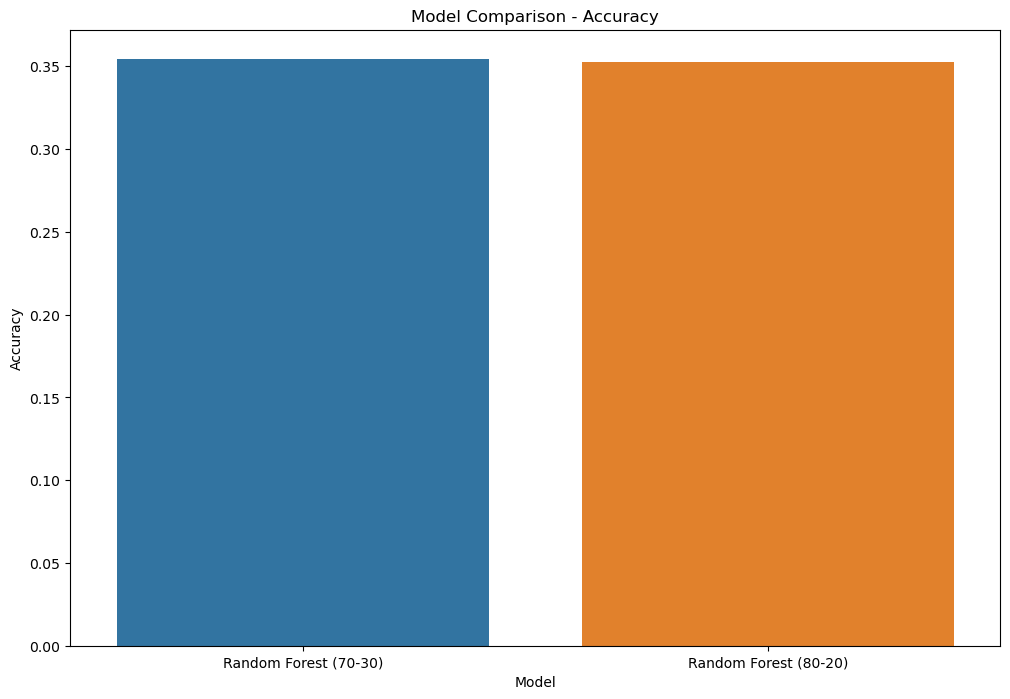

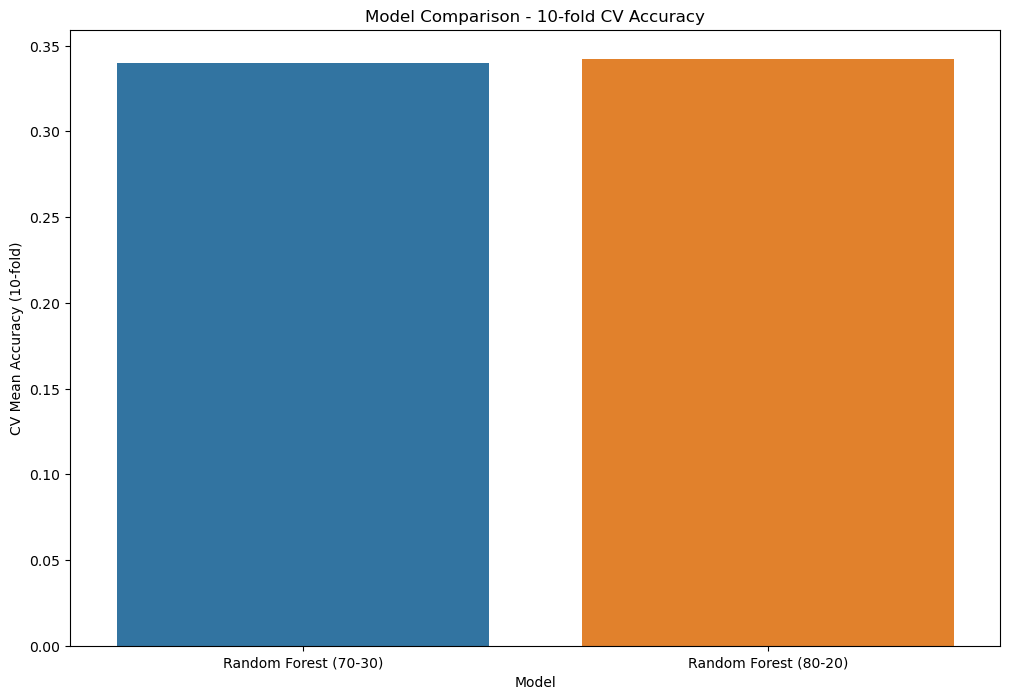

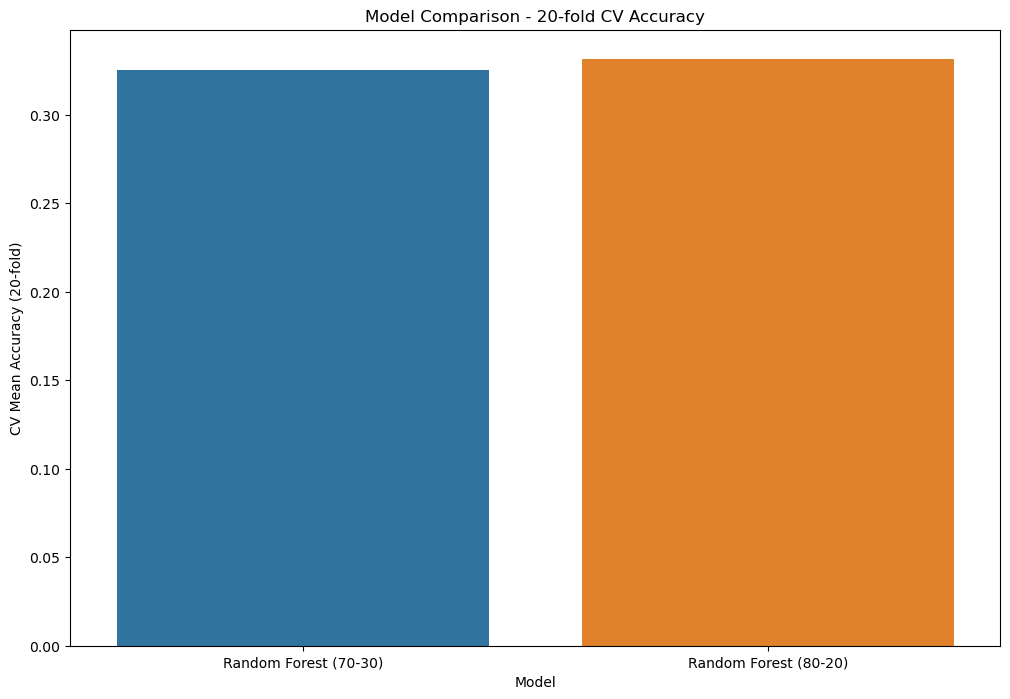

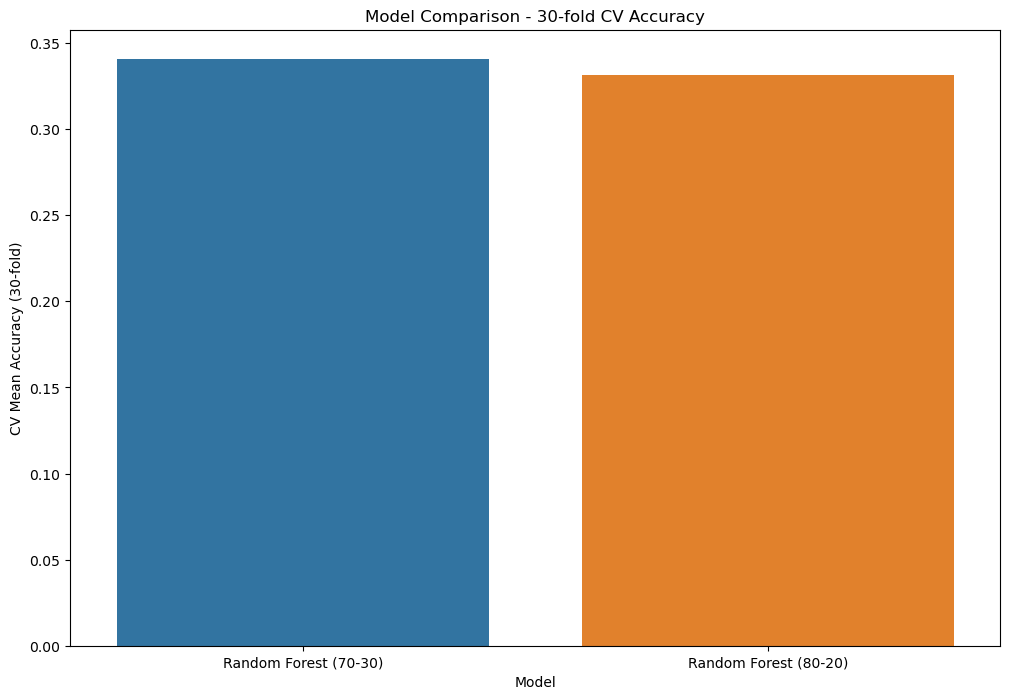

In [127]:
results = pd.DataFrame({
    'Model': ['Random Forest (70-30)', 'Random Forest (80-20)'],
    'Best Parameters': [best_parameters_70, best_parameters_80],
    'Accuracy': [accuracy_score(y_test_30, y_pred_30), accuracy_score(y_test_20, y_pred_20)],
    'CV Mean Accuracy (10-fold)': [cv_score_Kf10_split_70.mean(), cv_score_Kf10_split_80.mean()],
    'CV Mean Accuracy (20-fold)': [cv_score_Kf20_split_70.mean(), cv_score_Kf20_split_80.mean()],
    'CV Mean Accuracy (30-fold)': [cv_score_Kf30_split_70.mean(), cv_score_Kf30_split_80.mean()]
})

print(results)

plt.figure(figsize=(12, 8))
sns.barplot(x='Model', y='Accuracy', data=results)
plt.title('Model Comparison - Accuracy')
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(x='Model', y='CV Mean Accuracy (10-fold)', data=results)
plt.title('Model Comparison - 10-fold CV Accuracy')
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(x='Model', y='CV Mean Accuracy (20-fold)', data=results)
plt.title('Model Comparison - 20-fold CV Accuracy')
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(x='Model', y='CV Mean Accuracy (30-fold)', data=results)
plt.title('Model Comparison - 30-fold CV Accuracy')
plt.show()

